# Record Cleaning

**Metadata Summary**  
- 📅 **Date of Retrieval:** JULY 1, 2025  
- 🌐 **Source of Data:** LGU San Jacinto Treasury Records
- 📄 **License/Permission:**  
- 🧑‍💼 **Prepared by:** MARK JUNE E. ALMOJUELA

# PREPARATIONS

In [94]:
# Initial Library Import
import pandas as pd
import numpy as np
import os
from pathlib import Path

In [95]:
# File Exploration
data_dir_path = "../../dataset/raw/"
source_folder = "compiled"

# Map month prefixes to their numeric order
month_map = {
    'JAN': 1, 'FEB': 2, 'MAR': 3, 'APR': 4,
    'MAY': 5, 'JUN': 6, 'JUL': 7, 'AUG': 8,
    'SEP': 9, 'OCT': 10, 'NOV': 11, 'DEC': 12
}

try:
    years = [year for year in os.listdir(data_dir_path) if os.path.isdir(os.path.join(data_dir_path, year))]
    print("Available years:", years, '\n')

    for year in years:
        try:
            folder_path = os.path.join(data_dir_path, year, source_folder)
            csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

            # Sort by mapped month order using the first 3 characters
            sorted_files = sorted(
                csv_files,
                key=lambda x: month_map.get(x[:3].upper(), 99)  # Defaults to end if unrecognized prefix
            )

            print(f"{year}: {sorted_files}; \nCOUNT: {len(sorted_files)}\n")

        except FileNotFoundError:
            continue
        except NotADirectoryError:
            print("Path is not a directory")
        except PermissionError:
            print("Permission denied")
        except Exception as e:
            print(f"An error occurred: {e}")

except Exception as e:
    print(f"An error occurred: {e}")

Available years: ['2019', '2020', '2021', '2022', '2023', '2024', '2025'] 

2019: ['DEC_2019.csv']; 
COUNT: 1

2020: ['JAN_2020.csv', 'FEB_2020.csv', 'MAR_2020.csv', 'MAR_APR_2020.csv', 'APR_2020.csv', 'MAY_2020.csv', 'JUN_2020.csv', 'JUL_2020.csv', 'AUG_2020.csv', 'SEP_2020.csv', 'OCT_2020.csv', 'NOV_2020.csv']; 
COUNT: 12

2022: ['JAN_2022.csv', 'FEB_2022.csv', 'MAR_2022.csv', 'APR_2022.csv', 'MAY_2022.csv', 'JUN_2022.csv', 'JUL_2022.csv', 'AUG_2022.csv', 'SEP_2022.csv', 'OCT_2022.csv', 'NOV_2022.csv', 'DEC_2022.csv']; 
COUNT: 12

2023: ['JAN_2023.csv', 'FEB_2023.csv', 'MAR_2023.csv', 'APR_2023.csv', 'MAY_2023.csv', 'JUN_2023.csv', 'JUL_2023.csv', 'AUG_2023.csv', 'SEP_2023.csv', 'OCT_2023.csv', 'NOV_2023.csv', 'DEC_2023.csv']; 
COUNT: 12

2024: ['JAN_2024.csv', 'FEB_2024.csv', 'MAR_2024.csv', 'APR_2024.csv', 'MAY_2024.csv', 'JUN_2024.csv', 'JUL_2024.csv', 'AUG_2024.csv', 'SEP_2024.csv', 'OCT_2024.csv', 'NOV_2024.csv', 'DEC_2024.csv']; 
COUNT: 12

2025: ['JAN_2025.csv', 'FEB_2025.csv'

# INITIAL NORMALIZATION

In [8]:
# Initialization
%pip install dash 
%pip install missingno
%pip install dash-bootstrap-components

import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
import re
import os
from dash import dcc, html, dash_table
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import missingno as msno
from dash.dependencies import Input, Output
import io
import base64
from PIL import Image
import matplotlib.pyplot as plt

import dash_bootstrap_components as dbc


# NOTE: Run this cell only once

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


# Standardize the column names

In [96]:
from pathlib import Path
import re

source_folder = 'compiled'
output_dir = 'preprocessed'
source_dir = 'raw'

source_dir = Path(f"../../dataset/{source_dir}")
output_dir = Path(f"../../dataset/{output_dir}")
years = os.listdir(source_dir)

distinct_columns = set()
new_columns = {'Consumer\'s Name': 'Account Name', 'Water Meter Serial #': 'Meter Serial Number', 'Meter Serial No.': 'Meter Serial Number',
                'Present': 'Present Reading', 'Previous': 'Previous Reading', 'Consumption': 'Consumption', 'Status': 'Connection Status',
                'Address': 'Service Address', 'Type': 'Connection Type', 'Cons.': 'Consumption', 'Amount': 'Bill Amount', 'Control No.': 'Control Number'}
valid_columns = ['Consumption', 'Control Number', 'Account Name', 'Service Address', 'Present Reading', 'Connection Status', 'Bill Amount', 'Connection Type', 'Meter Serial Number', 'Previous Reading']

for year in years:
    try:
        files = os.listdir(source_dir / year / source_folder)
        os.makedirs(output_dir / year, exist_ok=True)
        for file in files:
            if not re.fullmatch(r'^[A-Z]{3}_[A-Z]{3}_\d{4}\.csv', file):
                df = pd.read_csv(source_dir / year / source_folder / file, encoding='latin1')
                df.columns = df.columns.str.strip()
                df.rename(columns=new_columns, inplace=True)
                distinct_columns.update(df.columns)

                if df.columns.isin(valid_columns).all():
                    cutoff = file.find(".csv")
                    df.to_csv(output_dir / year / f'{file[:cutoff]}_preprocessed.csv', index=False)
    except FileNotFoundError:
        continue

for col in distinct_columns:
    print(col)


Connection Status
Account Name
Control Number
Connection Type
Meter Serial Number
Consumption
Previous Reading
Service Address
Present Reading
Bill Amount


In [97]:
# Drop the old preprocessed files
source_dir = 'preprocessed'
source_dir = Path(f"../../dataset/{source_dir}")


for year in years:
    try:
        files = os.listdir(source_dir / year)
        for file in files:
            if re.fullmatch(r'^[A-Z]{3}\d{4}_preprocessed.csv', file) or re.fullmatch(r'^[A-Z]{3}_\d{4}\.csv_\d{4}_preprocessed.csv$', file):
                os.remove(source_dir / year / file)
    except FileNotFoundError:
        continue

In [98]:
for year in years:
    try:
        source_dir = Path(f"../../dataset/preprocessed/{year}")

        files = os.listdir(source_dir)
        files.sort()

        for file in files:
            print(file)
            df = pd.read_csv(source_dir / file)
            display(df.info())
    except FileNotFoundError:
        continue

DEC_2019_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1566 non-null   float64
 1   Account Name      1575 non-null   object 
 2   Service Address   1575 non-null   object 
 3   Previous Reading  1469 non-null   object 
 4   Present Reading   650 non-null    object 
 5   Consumption       835 non-null    float64
 6   Bill Amount       639 non-null    float64
dtypes: float64(3), object(4)
memory usage: 86.3+ KB


None

APR_2020_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Control Number       1632 non-null   float64
 1   Account Name         1633 non-null   object 
 2   Service Address      1633 non-null   object 
 3   Meter Serial Number  935 non-null    object 
 4   Previous Reading     1633 non-null   int64  
 5   Present Reading      1633 non-null   int64  
 6   Consumption          1633 non-null   int64  
 7   Bill Amount          1633 non-null   int64  
 8   Connection Status    1633 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 114.9+ KB


None

AUG_2020_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1629 entries, 0 to 1628
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1629 non-null   int64  
 1   Account Name      1629 non-null   object 
 2   Service Address   1629 non-null   object 
 3   Previous Reading  1568 non-null   object 
 4   Present Reading   1304 non-null   object 
 5   Consumption       1492 non-null   float64
 6   Bill Amount       1257 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 89.2+ KB


None

DEC_2020_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1575 entries, 0 to 1574
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1566 non-null   float64
 1   Account Name      1575 non-null   object 
 2   Service Address   1575 non-null   object 
 3   Previous Reading  1469 non-null   object 
 4   Present Reading   650 non-null    object 
 5   Consumption       835 non-null    float64
 6   Bill Amount       639 non-null    float64
dtypes: float64(3), object(4)
memory usage: 86.3+ KB


None

FEB_2020_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1624 entries, 0 to 1623
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1618 non-null   float64
 1   Account Name      1624 non-null   object 
 2   Service Address   1624 non-null   object 
 3   Previous Reading  1453 non-null   object 
 4   Present Reading   893 non-null    object 
 5   Consumption       1423 non-null   float64
 6   Bill Amount       1137 non-null   float64
dtypes: float64(3), object(4)
memory usage: 88.9+ KB


None

JAN_2020_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579 entries, 0 to 1578
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1572 non-null   float64
 1   Account Name      1579 non-null   object 
 2   Service Address   1579 non-null   object 
 3   Previous Reading  1419 non-null   object 
 4   Present Reading   1338 non-null   object 
 5   Consumption       1503 non-null   float64
 6   Bill Amount       1200 non-null   float64
dtypes: float64(3), object(4)
memory usage: 86.5+ KB


None

JUL_2020_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1630 non-null   int64  
 1   Account Name      1630 non-null   object 
 2   Service Address   1630 non-null   object 
 3   Previous Reading  1534 non-null   object 
 4   Present Reading   1241 non-null   object 
 5   Consumption       1477 non-null   float64
 6   Bill Amount       1242 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 89.3+ KB


None

JUN_2020_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1630 entries, 0 to 1629
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1629 non-null   float64
 1   Account Name      1630 non-null   object 
 2   Service Address   1630 non-null   object 
 3   Previous Reading  1579 non-null   object 
 4   Present Reading   1512 non-null   object 
 5   Consumption       1476 non-null   float64
 6   Bill Amount       1256 non-null   float64
dtypes: float64(3), object(4)
memory usage: 89.3+ KB


None

MAR_2020_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1633 entries, 0 to 1632
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1632 non-null   float64
 1   Account Name      1633 non-null   object 
 2   Service Address   1633 non-null   object 
 3   Previous Reading  1432 non-null   object 
 4   Present Reading   1230 non-null   object 
 5   Consumption       1525 non-null   float64
 6   Bill Amount       1217 non-null   float64
dtypes: float64(3), object(4)
memory usage: 89.4+ KB


None

MAY_2020_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1637 entries, 0 to 1636
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1634 non-null   float64
 1   Account Name      1637 non-null   object 
 2   Service Address   1637 non-null   object 
 3   Previous Reading  1464 non-null   object 
 4   Present Reading   1438 non-null   object 
 5   Consumption       1526 non-null   float64
 6   Bill Amount       1249 non-null   object 
dtypes: float64(2), object(5)
memory usage: 89.7+ KB


None

NOV_2020_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696 entries, 0 to 1695
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1696 non-null   int64  
 1   Account Name      1696 non-null   object 
 2   Service Address   1696 non-null   object 
 3   Previous Reading  1680 non-null   object 
 4   Present Reading   1287 non-null   object 
 5   Consumption       1529 non-null   float64
 6   Bill Amount       1291 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 92.9+ KB


None

OCT_2020_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1696 entries, 0 to 1695
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1696 non-null   int64  
 1   Account Name      1696 non-null   object 
 2   Service Address   1696 non-null   object 
 3   Previous Reading  1686 non-null   object 
 4   Present Reading   1306 non-null   object 
 5   Consumption       1541 non-null   float64
 6   Bill Amount       1301 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 92.9+ KB


None

SEP_2020_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1695 non-null   int64  
 1   Account Name      1695 non-null   object 
 2   Service Address   1695 non-null   object 
 3   Previous Reading  1676 non-null   object 
 4   Present Reading   1305 non-null   object 
 5   Consumption       1521 non-null   float64
 6   Bill Amount       1289 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 92.8+ KB


None

APR_2022_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1902 entries, 0 to 1901
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1902 non-null   int64  
 1   Account Name      1902 non-null   object 
 2   Service Address   1902 non-null   object 
 3   Previous Reading  1843 non-null   object 
 4   Present Reading   1791 non-null   object 
 5   Consumption       1666 non-null   float64
 6   Bill Amount       1447 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 104.1+ KB


None

AUG_2022_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889 entries, 0 to 1888
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1889 non-null   int64  
 1   Account Name      1889 non-null   object 
 2   Service Address   1889 non-null   object 
 3   Previous Reading  1364 non-null   float64
 4   Present Reading   1364 non-null   float64
 5   Consumption       1889 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 88.7+ KB


None

DEC_2022_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    2011 non-null   int64  
 1   Account Name      2011 non-null   object 
 2   Service Address   2011 non-null   object 
 3   Previous Reading  1947 non-null   object 
 4   Present Reading   1936 non-null   object 
 5   Consumption       1836 non-null   float64
 6   Bill Amount       1592 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 110.1+ KB


None

FEB_2022_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1879 entries, 0 to 1878
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1879 non-null   int64  
 1   Account Name      1879 non-null   object 
 2   Service Address   1879 non-null   object 
 3   Previous Reading  1804 non-null   object 
 4   Present Reading   1829 non-null   object 
 5   Consumption       1690 non-null   float64
 6   Bill Amount       1469 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 102.9+ KB


None

JAN_2022_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1864 entries, 0 to 1863
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1864 non-null   int64  
 1   Account Name      1864 non-null   object 
 2   Service Address   1864 non-null   object 
 3   Previous Reading  1796 non-null   object 
 4   Present Reading   1789 non-null   object 
 5   Consumption       1661 non-null   float64
 6   Bill Amount       1438 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 102.1+ KB


None

JUL_2022_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1929 entries, 0 to 1928
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1929 non-null   int64  
 1   Account Name      1929 non-null   object 
 2   Service Address   1929 non-null   object 
 3   Previous Reading  1871 non-null   object 
 4   Present Reading   1865 non-null   object 
 5   Consumption       1718 non-null   float64
 6   Bill Amount       1486 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 105.6+ KB


None

JUN_2022_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1929 entries, 0 to 1928
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1929 non-null   int64  
 1   Account Name      1929 non-null   object 
 2   Service Address   1929 non-null   object 
 3   Previous Reading  1853 non-null   object 
 4   Present Reading   1832 non-null   object 
 5   Consumption       1711 non-null   float64
 6   Bill Amount       1480 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 105.6+ KB


None

MAR_2022_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1883 non-null   int64  
 1   Account Name      1883 non-null   object 
 2   Service Address   1883 non-null   object 
 3   Previous Reading  1836 non-null   object 
 4   Present Reading   1773 non-null   object 
 5   Consumption       1647 non-null   float64
 6   Bill Amount       1427 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 103.1+ KB


None

MAY_2022_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1903 entries, 0 to 1902
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1903 non-null   int64  
 1   Account Name      1903 non-null   object 
 2   Service Address   1903 non-null   object 
 3   Previous Reading  1837 non-null   object 
 4   Present Reading   1830 non-null   object 
 5   Consumption       1669 non-null   float64
 6   Bill Amount       1450 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 104.2+ KB


None

NOV_2022_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    2005 non-null   int64  
 1   Account Name      2005 non-null   object 
 2   Service Address   2005 non-null   object 
 3   Previous Reading  1919 non-null   object 
 4   Present Reading   1603 non-null   object 
 5   Consumption       1818 non-null   float64
 6   Bill Amount       1584 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 109.8+ KB


None

OCT_2022_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1980 entries, 0 to 1979
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1980 non-null   int64  
 1   Account Name      1980 non-null   object 
 2   Service Address   1980 non-null   object 
 3   Previous Reading  1910 non-null   object 
 4   Present Reading   1863 non-null   object 
 5   Consumption       1798 non-null   float64
 6   Bill Amount       1566 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 108.4+ KB


None

SEP_2022_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1889 entries, 0 to 1888
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    1889 non-null   int64  
 1   Account Name      1889 non-null   object 
 2   Service Address   1889 non-null   object 
 3   Previous Reading  1364 non-null   float64
 4   Present Reading   1364 non-null   float64
 5   Consumption       1889 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 88.7+ KB


None

APR_2023_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    2015 non-null   int64  
 1   Account Name      2015 non-null   object 
 2   Service Address   2015 non-null   object 
 3   Previous Reading  1963 non-null   object 
 4   Present Reading   1964 non-null   object 
 5   Consumption       1860 non-null   float64
 6   Bill Amount       1621 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 110.3+ KB


None

AUG_2023_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    2043 non-null   int64  
 1   Account Name      2043 non-null   object 
 2   Service Address   2043 non-null   object 
 3   Previous Reading  1976 non-null   object 
 4   Present Reading   1997 non-null   object 
 5   Consumption       1855 non-null   float64
 6   Bill Amount       1622 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 111.9+ KB


None

DEC_2023_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2038 entries, 0 to 2037
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    2038 non-null   int64  
 1   Account Name      2038 non-null   object 
 2   Service Address   2038 non-null   object 
 3   Previous Reading  1516 non-null   float64
 4   Present Reading   1516 non-null   float64
 5   Consumption       1516 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 95.7+ KB


None

FEB_2023_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    2015 non-null   int64  
 1   Account Name      2015 non-null   object 
 2   Service Address   2015 non-null   object 
 3   Previous Reading  1944 non-null   object 
 4   Present Reading   1952 non-null   object 
 5   Consumption       1852 non-null   float64
 6   Bill Amount       1615 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 110.3+ KB


None

JAN_2023_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2011 entries, 0 to 2010
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    2011 non-null   int64  
 1   Account Name      2011 non-null   object 
 2   Service Address   2011 non-null   object 
 3   Previous Reading  1947 non-null   object 
 4   Present Reading   1934 non-null   object 
 5   Consumption       1823 non-null   float64
 6   Bill Amount       1589 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 110.1+ KB


None

JUL_2023_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2025 entries, 0 to 2024
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    2025 non-null   int64  
 1   Account Name      2025 non-null   object 
 2   Service Address   2025 non-null   object 
 3   Previous Reading  1962 non-null   object 
 4   Present Reading   1967 non-null   object 
 5   Consumption       1841 non-null   float64
 6   Bill Amount       1621 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 110.9+ KB


None

JUN_2023_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    2020 non-null   int64  
 1   Account Name      2020 non-null   object 
 2   Service Address   2020 non-null   object 
 3   Previous Reading  1929 non-null   object 
 4   Present Reading   1955 non-null   object 
 5   Consumption       1859 non-null   float64
 6   Bill Amount       1614 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 110.6+ KB


None

MAR_2023_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    2016 non-null   int64  
 1   Account Name      2016 non-null   object 
 2   Service Address   2016 non-null   object 
 3   Previous Reading  1549 non-null   float64
 4   Present Reading   1531 non-null   float64
 5   Consumption       2016 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 94.6+ KB


None

MAY_2023_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    2016 non-null   int64  
 1   Account Name      2016 non-null   object 
 2   Service Address   2016 non-null   object 
 3   Previous Reading  1966 non-null   object 
 4   Present Reading   1961 non-null   object 
 5   Consumption       1859 non-null   float64
 6   Bill Amount       1622 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 110.4+ KB


None

NOV_2023_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2038 entries, 0 to 2037
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    2038 non-null   int64  
 1   Account Name      2038 non-null   object 
 2   Service Address   2038 non-null   object 
 3   Previous Reading  1516 non-null   float64
 4   Present Reading   1516 non-null   float64
 5   Consumption       1516 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 95.7+ KB


None

OCT_2023_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071 entries, 0 to 2070
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    2070 non-null   float64
 1   Account Name      2071 non-null   object 
 2   Service Address   2071 non-null   object 
 3   Previous Reading  2013 non-null   object 
 4   Present Reading   2026 non-null   object 
 5   Consumption       1932 non-null   float64
 6   Bill Amount       1636 non-null   float64
dtypes: float64(3), object(4)
memory usage: 113.4+ KB


None

SEP_2023_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2059 entries, 0 to 2058
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    2056 non-null   object 
 1   Account Name      2059 non-null   object 
 2   Service Address   2059 non-null   object 
 3   Previous Reading  2001 non-null   object 
 4   Present Reading   2012 non-null   object 
 5   Consumption       1916 non-null   float64
 6   Bill Amount       1626 non-null   float64
dtypes: float64(2), object(5)
memory usage: 112.7+ KB


None

APR_2024_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2128 entries, 0 to 2127
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Control Number    2128 non-null   object
 1   Account Name      2128 non-null   object
 2   Service Address   2128 non-null   object
 3   Previous Reading  2080 non-null   object
 4   Present Reading   2081 non-null   object
 5   Consumption       2064 non-null   object
 6   Bill Amount       1891 non-null   object
dtypes: object(7)
memory usage: 116.5+ KB


None

AUG_2024_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136 entries, 0 to 2135
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Control Number     2136 non-null   float64
 1   Account Name       2136 non-null   object 
 2   Service Address    2136 non-null   object 
 3   Connection Type    2134 non-null   object 
 4   Previous Reading   2136 non-null   object 
 5   Present Reading    2135 non-null   object 
 6   Consumption        2136 non-null   object 
 7   Connection Status  2039 non-null   object 
dtypes: float64(1), object(7)
memory usage: 133.6+ KB


None

DEC_2024_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2151 entries, 0 to 2150
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Control Number     2150 non-null   float64
 1   Account Name       2151 non-null   object 
 2   Service Address    2151 non-null   object 
 3   Connection Type    2150 non-null   object 
 4   Previous Reading   2151 non-null   object 
 5   Present Reading    2145 non-null   object 
 6   Consumption        2151 non-null   object 
 7   Connection Status  2042 non-null   object 
dtypes: float64(1), object(7)
memory usage: 134.6+ KB


None

FEB_2024_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Control Number    2111 non-null   object
 1   Account Name      2111 non-null   object
 2   Service Address   2111 non-null   object
 3   Previous Reading  2068 non-null   object
 4   Present Reading   2072 non-null   object
 5   Consumption       2057 non-null   object
 6   Bill Amount       1874 non-null   object
dtypes: object(7)
memory usage: 115.6+ KB


None

JAN_2024_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2114 entries, 0 to 2113
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Control Number    2113 non-null   object
 1   Account Name      2114 non-null   object
 2   Service Address   2114 non-null   object
 3   Previous Reading  2057 non-null   object
 4   Present Reading   2055 non-null   object
 5   Consumption       2044 non-null   object
 6   Bill Amount       1847 non-null   object
dtypes: object(7)
memory usage: 115.7+ KB


None

JUL_2024_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2122 entries, 0 to 2121
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Control Number     2122 non-null   float64
 1   Account Name       2122 non-null   object 
 2   Service Address    2069 non-null   object 
 3   Connection Type    2117 non-null   object 
 4   Previous Reading   2122 non-null   object 
 5   Present Reading    2122 non-null   object 
 6   Consumption        2122 non-null   object 
 7   Connection Status  2013 non-null   object 
dtypes: float64(1), object(7)
memory usage: 132.8+ KB


None

JUN_2024_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Control Number    2129 non-null   float64
 1   Account Name      2129 non-null   object 
 2   Service Address   2129 non-null   object 
 3   Previous Reading  2103 non-null   object 
 4   Present Reading   2105 non-null   object 
 5   Consumption       2130 non-null   object 
 6   Bill Amount       1915 non-null   object 
dtypes: float64(1), object(6)
memory usage: 116.6+ KB


None

MAR_2024_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2112 entries, 0 to 2111
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Control Number    2111 non-null   object
 1   Account Name      2112 non-null   object
 2   Service Address   2112 non-null   object
 3   Previous Reading  2077 non-null   object
 4   Present Reading   2058 non-null   object
 5   Consumption       2046 non-null   object
 6   Bill Amount       1869 non-null   object
dtypes: object(7)
memory usage: 115.6+ KB


None

MAY_2024_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Control Number    2130 non-null   int64 
 1   Account Name      2130 non-null   object
 2   Service Address   2130 non-null   object
 3   Previous Reading  2086 non-null   object
 4   Present Reading   2091 non-null   object
 5   Consumption       2075 non-null   object
 6   Bill Amount       1904 non-null   object
dtypes: int64(1), object(6)
memory usage: 116.6+ KB


None

NOV_2024_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152 entries, 0 to 2151
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Control Number     2152 non-null   float64
 1   Account Name       2152 non-null   object 
 2   Service Address    2152 non-null   object 
 3   Connection Type    2151 non-null   object 
 4   Previous Reading   2152 non-null   object 
 5   Present Reading    2148 non-null   object 
 6   Consumption        2151 non-null   object 
 7   Connection Status  2041 non-null   object 
dtypes: float64(1), object(7)
memory usage: 134.6+ KB


None

OCT_2024_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2147 entries, 0 to 2146
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Control Number     2147 non-null   float64
 1   Account Name       2147 non-null   object 
 2   Service Address    2147 non-null   object 
 3   Connection Type    2147 non-null   object 
 4   Previous Reading   2147 non-null   object 
 5   Present Reading    2142 non-null   object 
 6   Consumption        2147 non-null   object 
 7   Connection Status  2043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 134.3+ KB


None

SEP_2024_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2139 entries, 0 to 2138
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Control Number     2138 non-null   float64
 1   Account Name       2138 non-null   object 
 2   Service Address    2139 non-null   object 
 3   Connection Type    2136 non-null   object 
 4   Previous Reading   2139 non-null   object 
 5   Present Reading    2138 non-null   object 
 6   Consumption        2139 non-null   object 
 7   Connection Status  2028 non-null   object 
dtypes: float64(1), object(7)
memory usage: 133.8+ KB


None

APR_2025_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2163 entries, 0 to 2162
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Control Number     2163 non-null   float64
 1   Account Name       2163 non-null   object 
 2   Service Address    2163 non-null   object 
 3   Connection Type    2163 non-null   object 
 4   Previous Reading   2163 non-null   object 
 5   Present Reading    2156 non-null   object 
 6   Consumption        2163 non-null   object 
 7   Connection Status  2062 non-null   object 
dtypes: float64(1), object(7)
memory usage: 135.3+ KB


None

FEB_2025_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2159 entries, 0 to 2158
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Control Number     2159 non-null   float64
 1   Account Name       2159 non-null   object 
 2   Service Address    2159 non-null   object 
 3   Connection Type    2159 non-null   object 
 4   Previous Reading   2159 non-null   object 
 5   Present Reading    2149 non-null   object 
 6   Consumption        2159 non-null   object 
 7   Connection Status  2038 non-null   object 
dtypes: float64(1), object(7)
memory usage: 135.1+ KB


None

JAN_2025_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2156 entries, 0 to 2155
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Control Number     2156 non-null   float64
 1   Account Name       2156 non-null   object 
 2   Service Address    2156 non-null   object 
 3   Connection Type    2155 non-null   object 
 4   Previous Reading   2156 non-null   object 
 5   Present Reading    2147 non-null   object 
 6   Consumption        2156 non-null   object 
 7   Connection Status  2039 non-null   object 
dtypes: float64(1), object(7)
memory usage: 134.9+ KB


None

MAR_2025_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2161 entries, 0 to 2160
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Control Number     2161 non-null   float64
 1   Account Name       2161 non-null   object 
 2   Service Address    2161 non-null   object 
 3   Connection Type    2161 non-null   object 
 4   Previous Reading   2161 non-null   object 
 5   Present Reading    2155 non-null   object 
 6   Consumption        2161 non-null   object 
 7   Connection Status  2058 non-null   object 
dtypes: float64(1), object(7)
memory usage: 135.2+ KB


None

MAY_2025_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Control Number     2167 non-null   float64
 1   Account Name       2167 non-null   object 
 2   Service Address    2167 non-null   object 
 3   Connection Type    2167 non-null   object 
 4   Previous Reading   2167 non-null   object 
 5   Present Reading    2155 non-null   object 
 6   Consumption        2167 non-null   object 
 7   Connection Status  2069 non-null   object 
dtypes: float64(1), object(7)
memory usage: 135.6+ KB


None

SEP_2025_preprocessed.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2167 entries, 0 to 2166
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Control Number     2167 non-null   float64
 1   Account Name       2167 non-null   object 
 2   Service Address    2167 non-null   object 
 3   Connection Type    2167 non-null   object 
 4   Previous Reading   2167 non-null   object 
 5   Present Reading    2155 non-null   object 
 6   Consumption        2167 non-null   object 
 7   Connection Status  2069 non-null   object 
dtypes: float64(1), object(7)
memory usage: 135.6+ KB


None

# Main Cleaning

In [99]:
# Explore unique values
unique_values = set()
base_dir_path = Path("../../dataset/preprocessed")
years = os.listdir(base_dir_path)
column_name = "Previous Reading"
should_filter_numeric = True

def is_numeric(value):
    try:
        float(str(value))
        return True
    except ValueError:
        return False

filtered_values = [v for v in unique_values if not is_numeric(v)]

for year in years:
    folder_path = Path("../../dataset/preprocessed") / year
    for file_path in folder_path.iterdir():
        if file_path.is_file() and file_path.suffix == ".csv":
            df = pd.read_csv(file_path)
            try:
                unique_values.update(df[column_name].unique())
            except KeyError:
                continue

filtered_values = [value for value in unique_values if not is_numeric(value)]
for address in sorted(map(str, filtered_values)):
    print(address)


 
  
                                                                                                                                                                                
 DISC
 DISC.
 Defect
-
CLOSED
CLOSED HOUSE
DEFECT
DEFET
DI16
DI80
DISC.
DiSC.
Disc
MOIST
NR
New Meter
T-CLOSE
T-DEFECT
T-Disc
TECH. DEFECT
TEMP. CLOSED
TEMP. DISC.
UNLOCATED METER
close
def
defect
diSC.
dis
disc.
moist
nm
nr
unlocated meter


In [192]:
# Dataset Cleaning Script: Billing Data Preprocessor
# Author: [Mark June Almojuela]
# Purpose: Detect anomalies, correct missing values, and export a cleaned dataset
# ----------------------------------------------------------------------------------

import os
import pandas as pd
from pathlib import Path
import utilities as util

# Known Anomaly Codes (Reading Flags)
invalid_reading_codes = {
    'DE12': 'Invalid Reading',
    'NR': 'Invalid Reading',
    'DI61': 'Invalid Reading',
    'DI21': 'Invalid Reading',
    'DI43': 'Invalid Reading',
    'DI07': 'Invalid Reading',
    'DISC.': 'Disconnected',
    'DEFECT': 'Defect',
    'DEFET': 'Defect',
    'TEMP. CLOSED': 'Temporarily Closed',
    'DISC': 'Disconnected',
    'Defect': 'Defect',
    'CLOSED': 'Temporarily Closed',
    'CLOSED HOUSE': 'Temporarily Closed',
    'DI16': 'Disconnected',
    'DI80': 'Disconnected',
    'DiSC.': 'Disconnected',
    'Disc': 'Disconnected',
    'MOIST': 'Invalid Reading',
    'New Meter': 'New Meter',
    'T-CLOSE': 'Temporarily Closed',
    'T-DEFECT': 'Defect',
    'T-Disc': 'Disconnected',
    'TECH. DEFECT': 'Defect',
    'TEMP. DISC.': 'Disconnected',
    'UNLOCATED METER': 'Invalid Reading',
    'close': 'Temporarily Closed',
    'def': 'Defect',
    'defect': 'Defect',
    'diSC.': 'Disconnected',
    'dis': 'Disconnected',
    'disc': 'Disconnected',
    'disc.': 'Disconnected',
    'moist': 'Invalid Reading',
    'nm': 'Invalid Reading',
    'nr': 'Invalid Reading',
    'unlocated meter': 'Invalid Reading'
}

# Helper Function: Check if Value Is Numeric
def is_numeric(value):
    try:
        if pd.isna(value):
            return False
        float(value)
        return True
    except (ValueError, TypeError):
        return False

# Core Cleaning Function: Processes Raw Billing Data
def clean_billing_df(df):
    # Initialize output columns
    df["Cleaned Previous Reading"] = None
    df["Cleaned Present Reading"] = None
    df["Connection Status"] = None
    df["Record Status"] = None

    # Row-wise cleansing logic
    for index, row in df.iterrows():
        present_val = row["Present Reading"]
        previous_val = row["Previous Reading"]

        present = str(present_val) if pd.notna(present_val) else ""
        previous = str(previous_val) if pd.notna(previous_val) else ""

        # Case 1: Anomaly code detected in Present or Previous
        if present in invalid_reading_codes or previous in invalid_reading_codes:
            code = present if present in invalid_reading_codes else previous
            df.at[index, "Connection Status"] = invalid_reading_codes[code]

            # Retain usable numeric data if available
            if pd.isna(row["Previous Reading"]) and pd.isna(row["Present Reading"]):
                df.at[index, "Record Status"] = "Empty"
            else:
                df.at[index, "Record Status"] = "Corrected"
            
            df.at[index, "Cleaned Previous Reading"] = row["Previous Reading"] if is_numeric(row["Previous Reading"]) else (
                row["Present Reading"] if is_numeric(row["Present Reading"]) else None)
            df.at[index, "Cleaned Present Reading"] = row["Present Reading"] if is_numeric(row["Present Reading"]) else (
                row["Previous Reading"] if is_numeric(row["Previous Reading"]) else None)

            # Sanitize raw values for downstream use
            df.at[index, "Previous Reading"] = None if previous in invalid_reading_codes else row["Previous Reading"]
            df.at[index, "Present Reading"] = None if present in invalid_reading_codes else row["Present Reading"]

        # Case 2: Missing Present but valid Previous
        elif pd.isna(row["Present Reading"]) and is_numeric(row["Previous Reading"]):
            df.at[index, "Cleaned Previous Reading"] = row["Previous Reading"]
            df.at[index, "Cleaned Present Reading"] = row["Previous Reading"]
            df.at[index, "Record Status"] = "Corrected"
            df.at[index, "Connection Status"] = "Active"

        # Case 3: Missing Previous but valid Present
        elif is_numeric(row["Present Reading"]) and pd.isna(row["Previous Reading"]):
            df.at[index, "Cleaned Previous Reading"] = row["Present Reading"]
            df.at[index, "Cleaned Present Reading"] = row["Present Reading"]
            df.at[index, "Record Status"] = "Corrected"
            df.at[index, "Connection Status"] = "Active"

        # Case 4: Both values are valid and numeric
        elif is_numeric(row["Present Reading"]) and is_numeric(row["Previous Reading"]):
            df.at[index, "Cleaned Previous Reading"] = row["Previous Reading"]
            df.at[index, "Cleaned Present Reading"] = row["Present Reading"]
            df.at[index, "Record Status"] = "Unchanged"
            df.at[index, "Connection Status"] = "Active"

        # Case 5: Both values missing
        elif pd.isna(row["Present Reading"]) and pd.isna(row["Previous Reading"]):
            df.at[index, "Connection Status"] = "Unknown"
            df.at[index, "Cleaned Previous Reading"] = None
            df.at[index, "Cleaned Present Reading"] = None
            df.at[index, "Record Status"] = "Empty"

        # Case 6: Fallback condition
        else:
            df.at[index, "Connection Status"] = "Unknown"

        if pd.notna(row['Cleaned Previous Reading']) and pd.notna(row['Cleaned Present Reading']) and row['Cleaned Previous Reading'] > row['Cleaned Present Reading']:
            df.at[index, 'Record Status'] = 'Invalid'

        elif pd.isna(row['Cleaned Previous Reading']) and pd.isna(row['Cleaned Present Reading']):
            df.at[index, 'Record Status'] = 'Corrected'

    return df

def compute_consumption(df):
    # Ensure columns are numeric, converting non-numeric to NaN
    df["Cleaned Present Reading"] = pd.to_numeric(df["Cleaned Present Reading"], errors='coerce')
    df["Cleaned Previous Reading"] = pd.to_numeric(df["Cleaned Previous Reading"], errors='coerce')
    
    # Create a mask for valid records
    valid_mask = ~df['Record Status'].isin(['Invalid', 'Empty'])
    
    # Initialize the column with 0
    df["Cleaned Consumption"] = 0
    
    # Calculate consumption only for valid records where both values are not null
    mask = valid_mask & df["Cleaned Present Reading"].notna() & df["Cleaned Previous Reading"].notna()
    df.loc[mask, "Cleaned Consumption"] = (
        df.loc[mask, "Cleaned Present Reading"] - 
        df.loc[mask, "Cleaned Previous Reading"]
    )
    
    # Handle cases where consumption would be negative (which might indicate a meter reset)
    df.loc[df["Cleaned Consumption"] < 0, "Cleaned Consumption"] = 0
    
    return df

def add_month_year(df):
    df["Month"] = month
    df["Year"] = year
    df['Quarter'] = df['Month'].map({
        'JAN': 'Q1',
        'FEB': 'Q1',
        'MAR': 'Q1',
        'APR': 'Q2',
        'MAY': 'Q2',
        'JUN': 'Q2',
        'JUL': 'Q3',
        'AUG': 'Q3',
        'SEP': 'Q3',
        'OCT': 'Q4',
        'NOV': 'Q4',
        'DEC': 'Q4'
    })
    return df


# Mapping Dictionaries
districts = {
    'DIST 1': 'District 1',
    'DIST 2': 'District 2',
    'DIST 3': 'District 3',
    'DIST 4': 'District 4',
    'BLISS': 'Burgos',
    '1': 'District 1',
    '2': 'District 2',
    '3': 'District 3',
    '4': 'District 4',
}

streets = {
    '0': None,
    'ALICANTE ST': 'Alicante Street',
    'ALMONTE ST': 'Almonte Street',
    'ALTAREJOS ST': 'Altarejos Street',
    'AMICAN ST': 'Amican Street',
    'BALCAVEM ST': 'Balcavem Street',
    'BALINTONG ST': 'Balintong Street',
    'BARSAGA ST': 'Barsaga Street',
    'BARTOLABAC ST 1': 'Bartolabac Street',
    'BARTOLABAC ST': 'Bartolabac Street',
    'BARTOLAY ST DIST 1': 'Bartolay Street',
    'BARTOLAY ST DIST 3': 'Bartolay Street',
    'BARTOLAY ST DIST 4': 'Bartolay Street',
    'BARTOLAY ST': 'Bartolay Street',
    'BAILON ST DIST 2': 'Bailon Street',
    'BAILON ST': 'Bailon Street',
    'BINALI': 'Binaliw',
    'DON JUAN ST': 'Don Juan Street',
    'ESPARRAGO ST': 'Esparrago Street',
    'ESPINOSA ST': 'Espinosa Street',
    'FABMAR ST': 'Fabmar Street',
    'FLORES ST': 'Flores Street',
    'GRAFILO ST': 'Grafilo Street',
    'GUTIERREZ ST': 'Gutierrez Street',
    'JONES ST': 'Jones Street',
    'LETADA ST': 'Letada Street',
    'LIQUE ST': 'Lique Street',
    'MOYOT ST DIST 1': 'Moyot Street',
    'MOYOT ST DIST 2': 'Moyot Street',
    'MOYOT ST': 'Moyot Street',
    'NHA DUPLEX': 'NHA Duplex',
    'PUR': 'Puro',
    'TALAB': 'Talaba',
    'TANGNA': 'Tangnan',
    'UPPE': 'Upper Bliss',
    'UPPER': 'Upper Bliss',
    'VILLAMOR ST': 'Villamor Street'
}


def split_address(df):
    if 'Service Address' in df.columns:
        df['Street'] = ''
        df['District'] = ''
        for index, row in df.iterrows():
            address = str(row['Service Address'])
            parts = address.split('.,')
            if len(parts) == 2:
                df.at[index, 'Street'] = streets.get(parts[0].replace('.','').strip().upper(), parts[0].strip())
                df.at[index, 'District'] = districts.get(parts[1].strip().replace('.','').upper(), parts[1].strip())
                continue

            parts = address.split('. ')
            if len(parts) == 2:
                df.at[index, 'Street'] = streets.get(parts[0].replace('.','').strip().upper(), parts[0].strip())
                df.at[index, 'District'] = districts.get(parts[1].replace('.','').strip().upper(), parts[1].strip())
                continue

            parts = address.split(',')
            if len(parts) == 2:
                df.at[index, 'Street'] = streets.get(parts[0].replace('.','').strip().upper(), parts[0].strip())
                df.at[index, 'District'] = districts.get(parts[1].replace('.','').strip().upper(), parts[1].strip())
                continue
            
            elif address:
                df.at[index, 'Street'] = streets.get(address.replace('.','').strip().upper(), address.strip()) if address else None
                df.at[index, 'District'] = None
                continue

            else:
                df.at[index, 'Street'] = None
                df.at[index, 'District'] = None
    
    return df

def standardize_connection_type(df):
    if 'Connection Type' in df.columns:
        types = {
            'R': 'Residential',
            'I': 'Industrial',
            'C': 'Commercial',
        }
        df['Connection Type'] = df['Connection Type'].str.strip().str.upper().replace(types)
    return df

def change_dtype(df):
    df['Control Number'] = df['Control Number'].astype(str)
    df['Month'] = df['Month'].astype(str)
    df['Quarter'] = df['Quarter'].astype(str)
    df['Account Name'] = df['Account Name'].astype(str)
    df['Service Address'] = df['Service Address'].astype(str)
    df['Record Status'] = df['Record Status'].astype(str)
    df['Connection Status'] = df['Connection Status'].astype(str)

    df['Year'] = pd.to_numeric(df['Year'], errors='coerce').astype(int)
    df['Cleaned Consumption'] = pd.to_numeric(df['Cleaned Consumption'], errors='coerce').astype(int)

    return df

def sanitize_control_numbers(df):
    df['Control Number'] = df['Control Number'].str.strip().str.replace('.0', '')
    return df

# 📐 Desired Output Column Order (Report-Ready)
ordered_columns = [
    "Month",
    "Year",
    "Quarter",
    "District",
    "Street",
    "Control Number",
    "Account Name",
    "Connection Type",
    "Service Address",
    "Previous Reading",
    "Present Reading",
    "Cleaned Previous Reading",
    "Cleaned Present Reading",
    "Cleaned Consumption",
    "Record Status",
    "Connection Status"
]

base_dir_path = Path("../../dataset/preprocessed")
output_dir_path = Path("../../dataset/clean/semi_clean")

years = os.listdir(base_dir_path)

# Paths and Filenames
for year in years:
    files = os.listdir(base_dir_path / year)
    os.makedirs(output_dir_path / year, exist_ok=True)
    for file in files:
        month = file[0:3].upper()
        file_path = base_dir_path / year / file
        output_dir = output_dir_path / year

        raw_df = pd.DataFrame()

        try:
            raw_df = util.read_csv(file_path)
        except UnicodeDecodeError as e:
            print(f"Failed to read {file_path}: {e}")
            continue

        # 🧼 Run Cleaning Logic
        cleaned_df = clean_billing_df(raw_df)
        cleaned_df = compute_consumption(cleaned_df)
        cleaned_df = add_month_year(cleaned_df)
        cleaned_df = change_dtype(cleaned_df)
        cleaned_df = standardize_connection_type(cleaned_df)
        cleaned_df = split_address(cleaned_df)
        final_df = sanitize_control_numbers(cleaned_df)

        # 🧾 Reorder Columns for Consistent Output
        final_columns = [col for col in ordered_columns if col in final_df.columns]
        ordered_cleaned_df = final_df[final_columns]

        # 👀 Preview Top 5 Cleaned Records
        print(f"\n📊 Cleaned Preview: {month} {year}")
        print(ordered_cleaned_df.head())

        # 📈 Status Summary
        print("\n🧾 Record Status Summary:")
        print(ordered_cleaned_df["Record Status"].value_counts())

        print("\n🧾 Dataset Shape: ")
        print(ordered_cleaned_df.shape)

        # 💾 Save Cleaned Dataset
        os.makedirs(output_dir, exist_ok=True)
        ordered_cleaned_df.to_csv(output_dir / f"{month}_{year}_semi_clean.csv", index=False)

        print(f"\n✅ Cleaned data exported successfully to: {output_dir}")

print("\n✅ All datasets cleaned and exported successfully!")


📊 Cleaned Preview: DEC 2019
  Month  Year Quarter District           Street Control Number  \
0   DEC  2019      Q4     None  Alicante Street         501549   
1   DEC  2019      Q4     None  Alicante Street         500750   
2   DEC  2019      Q4     None  Alicante Street         500990   
3   DEC  2019      Q4     None  Alicante Street         500505   
4   DEC  2019      Q4     None  Alicante Street         501542   

          Account Name Service Address Previous Reading Present Reading  \
0      AlbaÃ±o, Lilane    Alicante St.              198             NaN   
1  Aljecera, Marcelino    Alicante St.             None             NaN   
2      AlmiÃ±ana, Irus    Alicante St.              437             NaN   
3      AlmiÃ±e, Edison    Alicante St.             None             NaN   
4      AlmiÃ±e, Filben    Alicante St.             3211             NaN   

   Cleaned Previous Reading  Cleaned Present Reading  Cleaned Consumption  \
0                     198.0                   

# Dataset Merge-Fill

In [194]:
# Helper Function: Check for Duplicated Values
base_dir_path = Path("../../dataset/clean/semi_clean")

duplicated_values = set()

years = os.listdir(base_dir_path)
for year in years:
    try:
        files = os.listdir(base_dir_path / year)
        for file in files:
            df = pd.read_csv(base_dir_path / year / file)
            duplicated_values.update(df['District'].unique())
    except NotADirectoryError as e:
        continue

if duplicated_values:
    print("Duplicated Values:")
    for value in duplicated_values:
        print(value)
else:
    print("No duplicated values found.")


Duplicated Values:
nan
District 2
District 4
Calipat-an
District 1
District 3
Burgos
Lipata


In [103]:
# Helper Function: Check for Column Checks
base_dir_path = Path("../../dataset/clean/semi_clean")

years = os.listdir(base_dir_path)
for year in years:
    try:
        files = os.listdir(base_dir_path / year)
        for file in files:
            df = pd.read_csv(base_dir_path / year / file)
            print(f"{year} {file}")
            print(df.columns)
    except NotADirectoryError as e:
        continue



2019 DEC_2019_semi_clean.csv
Index(['Month', 'Year', 'Quarter', 'District', 'Street', 'Control Number',
       'Account Name', 'Service Address', 'Previous Reading',
       'Present Reading', 'Cleaned Previous Reading',
       'Cleaned Present Reading', 'Cleaned Consumption', 'Record Status',
       'Connection Status'],
      dtype='object')
2020 APR_2020_semi_clean.csv
Index(['Month', 'Year', 'Quarter', 'District', 'Street', 'Control Number',
       'Account Name', 'Service Address', 'Previous Reading',
       'Present Reading', 'Cleaned Previous Reading',
       'Cleaned Present Reading', 'Cleaned Consumption', 'Record Status',
       'Connection Status'],
      dtype='object')
2020 AUG_2020_semi_clean.csv
Index(['Month', 'Year', 'Quarter', 'District', 'Street', 'Control Number',
       'Account Name', 'Service Address', 'Previous Reading',
       'Present Reading', 'Cleaned Previous Reading',
       'Cleaned Present Reading', 'Cleaned Consumption', 'Record Status',
       'Connecti

In [197]:
import pandas as pd
import os
from pathlib import Path
import utilities as util
import re

# Paths
base_dir_path = Path("../../dataset/clean/semi_clean")
output_dir_path = Path("../../dataset/clean/semi_clean")
assert base_dir_path.exists(), "Base directory does not exist"
assert output_dir_path.exists(), "Output directory does not exist"

# Extract and standardize Street and District
def parse_address(row):
    street_val = str(row['Street']).strip().upper() if pd.notna(row['Street']) else None
    district_val = str(row['District']).strip().upper() if pd.notna(row['District']) else None
    street = streets.get(street_val, row['Street'])
    district = districts.get(district_val, row['District'])
    return pd.Series([street, district])

def is_valid_name(name):
    if pd.isna(name) or not isinstance(name, str):
        return False
    # Match only if all characters are allowed
    return bool(re.match(r'^[A-Za-z0-9(),./\\ ]+$', name))

# Default structure
default_columns = [
    'Control Number', 
    'Account Name', 
    'Connection Type', 
    'Service Address', 
    'District', 
    'Street'
]

years = [d for d in os.listdir(base_dir_path) if (base_dir_path / d).is_dir()]
master_records = [] 

for year in years:
    year_path = base_dir_path / year
    files = [f for f in os.listdir(year_path) if f.endswith(".csv") and not f.startswith("cleaned_")]

    for file in files:
        print(f"Processing {file}...")
        file_path = year_path / file
        df = util.read_csv(file_path)

        # Ensure Connection Type column exists
        if 'Connection Type' not in df.columns:
            df['Connection Type'] = pd.NA

        # Keep only expected columns
        df = df[[col for col in default_columns if col in df.columns]]

        # Drop fully empty rows and reset index
        df = df.dropna(how='all').reset_index(drop=True)

        # Parse addresses
        df[['Street', 'District']] = df.apply(parse_address, axis=1)

        # Append to list
        master_records.append(df)

# Merge all into one DataFrame
master_df = pd.concat(master_records, ignore_index=True)

# Remove duplicates based on Control Number (keeping best address)
master_df.sort_values(by=['Service Address'], key=lambda x: x.str.len(), ascending=False, inplace=True)
master_df.drop_duplicates(subset=['Control Number'], keep='first', inplace=True)

# Remove invalid names
master_df = master_df[master_df['Account Name'].apply(is_valid_name)]

# Final projection
final_cols = ['Control Number', 'Account Name', 'Connection Type', 'Service Address', 'District', 'Street']
master_df = master_df[final_cols]

# Save
file_path = output_dir_path / "cleaned_master.csv"

if util.save_csv(master_df, file_path):
    print("Master DataFrame saved successfully.")
else:
    print("Failed to save Master DataFrame.")

Processing DEC_2019_semi_clean.csv...
Processing APR_2020_semi_clean.csv...
Processing AUG_2020_semi_clean.csv...
Processing DEC_2020_semi_clean.csv...
Processing FEB_2020_semi_clean.csv...
Processing JAN_2020_semi_clean.csv...
Processing JUL_2020_semi_clean.csv...
Processing JUN_2020_semi_clean.csv...
Processing MAR_2020_semi_clean.csv...
Processing MAY_2020_semi_clean.csv...
Processing NOV_2020_semi_clean.csv...
Processing OCT_2020_semi_clean.csv...
Processing SEP_2020_semi_clean.csv...
Processing APR_2022_semi_clean.csv...
Processing AUG_2022_semi_clean.csv...
Processing DEC_2022_semi_clean.csv...
Processing FEB_2022_semi_clean.csv...
Processing JAN_2022_semi_clean.csv...
Processing JUL_2022_semi_clean.csv...
Processing JUN_2022_semi_clean.csv...
Processing MAR_2022_semi_clean.csv...
Processing MAY_2022_semi_clean.csv...
Processing NOV_2022_semi_clean.csv...
Processing OCT_2022_semi_clean.csv...
Processing SEP_2022_semi_clean.csv...
Processing APR_2023_semi_clean.csv...
Processing A

In [198]:
# Merge the cleaned semi_cleaned datasets with the cleaned master dataset
import os
from pathlib import Path
import utilities as util

def merge_connection_type(df, initial):
    if initial:
        if 'Connection Type' not in df.columns:
            df['Connection Type'] = None
    else:
        df['Connection Type'] = df['Connection Type_master'].where(
            df['Connection Type_master'].notna() & (df['Connection Type_master'].str.strip() != ''), 
            df['Connection Type']
        )
    return df

def merge_service_address(df, initial):
    if initial:
        if 'Service Address' not in df.columns:
            df['Service Address'] = None
    else:
        df['Service Address'] = df['Service Address_master'].where(
            df['Service Address_master'].notna() & (df['Service Address_master'].str.strip() != ''), 
            df['Service Address']
        )
    return df

def merge_district(df, initial):
    if initial:
        if 'District' not in df.columns:
            df['District'] = None
    else:
        df['District'] = df['District_master'].where(
            df['District_master'].notna() & (df['District_master'].str.strip() != ''), 
            df['District']
        )
    return df

def merge_street(df, initial):
    if initial:
        if 'Street' not in df.columns:
            df['Street'] = None
    else:
        df['Street'] = df['Street_master'].where(
            df['Street_master'].notna() & (df['Street_master'].str.strip() != ''), 
            df['Street']
        )
    return df

master_df_path = Path("../../dataset/clean/semi_clean/cleaned_master.csv")
base_dir_path = Path("../../dataset/clean/semi_clean")
output_dir_path = Path("../../dataset/clean/pre_production")
years = [year for year in os.listdir(base_dir_path) if not year.startswith("cleaned_")]

master_df = util.read_csv(master_df_path)
master_df['Control Number'] = master_df['Control Number'].astype(str).str.strip().str.replace(r'\.0$', '', regex=True)

final_columns = [
    "Month",
    "Year",
    "Quarter",
    "District",
    "Street",
    "Control Number",
    "Account Name",
    "Connection Type",
    "Service Address",
    "Previous Reading",
    "Present Reading",
    "Cleaned Previous Reading",
    "Cleaned Present Reading",
    "Cleaned Consumption",
    "Record Status",
    "Connection Status"
]

for year in years:
    try:
        folder_path = os.path.join(base_dir_path, year)
        output_path = os.path.join(output_dir_path, year)
        os.makedirs(output_path, exist_ok=True)
        csv_files = [f for f in os.listdir(folder_path) if f.endswith(".csv") and not f.startswith("cleaned_")]

        for file in csv_files:
            try:
                df = util.read_csv(os.path.join(folder_path, file))
                df['Control Number'] = df['Control Number'].astype(str).str.strip().str.replace(r'\.0$', '', regex=True)
                
                df = merge_connection_type(df, initial=True)
                df = merge_service_address(df, initial=True)
                df = merge_district(df, initial=True)
                df = merge_street(df, initial=True)

                merged_df = df.merge(master_df, on=['Control Number'], how='left', suffixes = ('', '_master'))
                merged_df = merge_connection_type(merged_df, initial=False)
                merged_df = merge_service_address(merged_df, initial=False)
                merged_df = merge_district(merged_df, initial=False)
                merged_df = merge_street(merged_df, initial=False)

                final_df = merged_df[final_columns]

                file_name = file[:3]
                util.save_csv(final_df, os.path.join(output_path, file_name + "_" + year + "_pre_production.csv"))
            except Exception as e:
                print(f"An error occurred while processing {file}: {e}")

    except FileNotFoundError:
        continue
    except NotADirectoryError as e:
        print("Path is not a directory: ", e)
    except PermissionError as e:
        print("Permission denied", e)
    except Exception as e:
        print(f"An error occurred: {e}")

print("Pre-production dataset has been created successfully.")

Pre-production dataset has been created successfully.


# Dataset Check

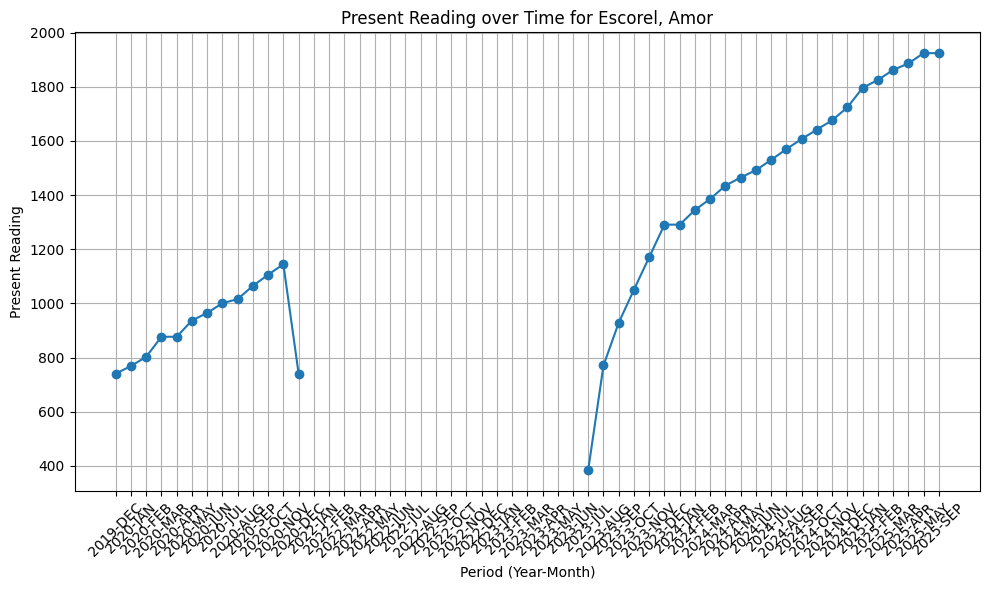

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

# Combine all consumer records into one DataFrame
consumer_df = pd.concat(consumer_record, ignore_index=True)

# Ensure correct data types
consumer_df['Present Reading'] = pd.to_numeric(consumer_df['Present Reading'], errors='coerce')
consumer_df['Year'] = pd.to_numeric(consumer_df['Year'], errors='coerce')

# Convert month to categorical for proper ordering
month_order = ["JAN", "FEB", "MAR", "APR", "MAY", "JUN", 
               "JUL", "AUG", "SEP", "OCT", "NOV", "DEC"]
consumer_df['Month'] = pd.Categorical(consumer_df['Month'], categories=month_order, ordered=True)

# Sort by year and calendar month
consumer_df = consumer_df.sort_values(by=['Year', 'Month'])

# Combine Year and Month for plotting
consumer_df['Period'] = consumer_df['Year'].astype(str) + "-" + consumer_df['Month'].astype(str)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(consumer_df['Period'], consumer_df['Present Reading'], marker='o')
plt.xticks(rotation=45)
plt.xlabel("Period (Year-Month)")
plt.ylabel("Present Reading")
plt.title("Present Reading over Time for Escorel, Amor")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Dataset Exploration
base_dir_path = Path("../../dataset/clean/semi_clean")

years = os.listdir(base_dir_path)

# Paths and Filenames
for year in years:
    files = os.listdir(base_dir_path / year)
    for file in files:
        month = file.split("_")[0]
        file_path = base_dir_path / year / file
        try:
            raw_df = pd.read_csv(file_path, encoding='latin-1')
        except UnicodeDecodeError:
            try:
                raw_df = pd.read_csv(file_path, encoding='utf-16')
            except UnicodeDecodeError:
                raw_df = pd.read_csv(file_path, encoding='utf-8')

        def check_instance(x):
            if isinstance(x, str) and re.search(r"[a-zA-Z]", x):
                non_numeric_value_list.append(x)
            else:   
                pass

        print(f"Shape of {month}{year}:", raw_df.shape)
        display(raw_df.head())
        print(f"\nDuplicate records in {month}{year}:", raw_df.duplicated(keep='first').sum())
        print(f"Duplicate control number count in {month}{year}:", raw_df["Control Number"].duplicated().sum())

        print(f"\nMissing values in {month}{year}:\n", raw_df.isnull().sum())

        non_numeric_value_list = []

        raw_df["Present Reading"].apply(lambda x: check_instance(x))
        raw_df["Previous Reading"].apply(lambda x: check_instance(x))

        non_numeric_value_list = set(non_numeric_value_list)

        print(f"\nNon-numeric values in {month}{year}: {non_numeric_value_list}")
        print(f"Non-numeric values count in {month}{year}: {len(non_numeric_value_list)}")


In [203]:
# Calculate cleaned consumption
df = ordered_cleaned_df.copy()

# Ensure columns are numeric, converting non-numeric to NaN
df["Cleaned Present Reading"] = pd.to_numeric(df["Cleaned Present Reading"], errors='coerce')
df["Cleaned Previous Reading"] = pd.to_numeric(df["Cleaned Previous Reading"], errors='coerce')

# Calculate consumption only for valid records
valid_mask = ~df['Record Status'].isin(['Invalid', 'Empty'])
df["Cleaned Consumption"] = 0
mask = valid_mask & df["Cleaned Present Reading"].notna() & df["Cleaned Previous Reading"].notna()
df.loc[mask, "Cleaned Consumption"] = (
    df.loc[mask, "Cleaned Present Reading"] - 
    df.loc[mask, "Cleaned Previous Reading"]
)
# Handle negative consumption (could indicate meter reset)
df.loc[df["Cleaned Consumption"] < 0, "Cleaned Consumption"] = 0

# 1. Dataset Overview
shape_info = f"Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns"

# 2. Create figures with white background
# Common layout settings
white_bg = dict(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black'),
    xaxis=dict(showgrid=False, linecolor='black', showline=True),
    yaxis=dict(showgrid=False, linecolor='black', showline=True)
)

# Record Status Distribution
status_counts = df["Record Status"].value_counts().reset_index()
status_counts.columns = ["Status", "Count"]
status_fig = px.pie(status_counts, names="Status", values="Count", 
                   title="Record Status Distribution",
                   color_discrete_sequence=px.colors.qualitative.Set3)
status_fig.update_layout(white_bg)

# Connection Status Distribution
connection_counts = df["Connection Status"].value_counts().reset_index()
connection_counts.columns = ["Status", "Count"]
connection_fig = px.bar(connection_counts, x="Status", y="Count", 
                       title="Connection Status Distribution",
                       color="Status",
                       color_discrete_sequence=px.colors.qualitative.Pastel)
connection_fig.update_layout(white_bg)

# Consumption Distribution
consumption_fig = px.histogram(df[df["Cleaned Consumption"] > 0], 
                              x="Cleaned Consumption",
                              title="Distribution of Water Consumption (Excluding Zero Consumption)",
                              nbins=50,
                              color_discrete_sequence=['#636EFA'])
consumption_fig.update_layout(white_bg)

# Summary Statistics for Selected Columns
selected_columns = ['Previous Reading', 'Present Reading', 'Cleaned Previous Reading', 'Cleaned Present Reading', 'Cleaned Consumption']
summary_stats = df[selected_columns].describe().reset_index()

# Initialize the app
app = dash.Dash(__name__)

# App layout
app.layout = html.Div(style={'backgroundColor': 'white'}, children=[
    html.Div([
        html.H1(f"{month} {year} Billing Data Analysis", 
               style={"textAlign": "center", "margin-bottom": "20px", "color": "black"}),
        
        # Dataset Overview Card
        html.Div([
            html.H3("📊 Dataset Overview", style={"color": "black"}),
            html.P(shape_info, style={"color": "black"}),
            html.Hr(),
            
            # Summary Statistics for Selected Columns
            html.H4("Summary Statistics (Numeric Columns)", style={"color": "black", "marginTop": "20px"}),
            dash_table.DataTable(
                columns=[{"name": i, "id": i} for i in summary_stats.columns],
                data=summary_stats.to_dict('records'),
                style_table={'overflowX': 'auto'},
                style_cell={
                    'textAlign': 'left', 
                    'padding': '8px',
                    'color': 'black',
                    'backgroundColor': 'white',
                    'border': '1px solid #ddd'
                },
                style_header={
                    'backgroundColor': 'rgb(230, 230, 230)',
                    'fontWeight': 'bold',
                    'color': 'black'
                },
                style_data_conditional=[
                    {
                        'if': {'row_index': 'odd'},
                        'backgroundColor': 'rgb(248, 248, 248)',
                    }
                ]
            )
        ], style={
            'padding': '20px', 
            'margin': '10px', 
            'border': '1px solid #ddd', 
            'border-radius': '5px',
            'backgroundColor': 'white'
        }),
        
        # First Row: Status Distributions
        html.Div([
            html.Div([
                dcc.Graph(figure=status_fig)
            ], className="six columns"),
            
            html.Div([
                dcc.Graph(figure=connection_fig)
            ], className="six columns")
        ], className="row"),

        # Second Row: Consumption Analysis
        html.Div([
            html.Div([
                dcc.Graph(figure=consumption_fig)
            ], className="twelve columns")
        ], className="row"),
        
        # Data Sample - Updated to include Cleaned Consumption
        html.Div([
            html.H3("Data Sample (First 10 Rows)", style={"color": "black"}),
            dash_table.DataTable(
                data=df[selected_columns].head(10).to_dict('records'),
                columns=[{"name": i, "id": i} for i in selected_columns],
                page_size=10,
                style_table={'overflowX': 'auto'},
                style_cell={
                    'textAlign': 'left',
                    'padding': '8px',
                    'maxWidth': '180px',
                    'textOverflow': 'ellipsis',
                    'whiteSpace': 'normal',
                    'color': 'black',
                    'backgroundColor': 'white',
                    'border': '1px solid #ddd'
                },
                style_header={
                    'backgroundColor': 'rgb(230, 230, 230)',
                    'fontWeight': 'bold',
                    'color': 'black'
                },
                style_data_conditional=[
                    {
                        'if': {'row_index': 'odd'},
                        'backgroundColor': 'rgb(248, 248, 248)',
                    }
                ],
                tooltip_data=[{
                    column: {'value': str(value), 'type': 'markdown'}
                    for column, value in row.items()
                } for row in df[selected_columns].head(10).to_dict('records')],
                tooltip_duration=None
            )
        ], style={
            'padding': '20px', 
            'margin': '10px', 
            'border': '1px solid #ddd', 
            'border-radius': '5px',
            'backgroundColor': 'white'
        }),
    ])
])

# Add some basic styling
app.layout.children.insert(0, html.Div(style={
    'fontFamily': 'Arial, sans-serif', 
    'margin': '0 auto', 
    'maxWidth': '1200px',
    'backgroundColor': 'white',
    'color': 'black'
}))

if __name__ == "__main__":
    app.run(debug=True)
    

# PREPROCESSED DATA REVIEW

In [251]:
# Initialization
year = "2020"

In [252]:
import pandas as pd
import os

# 📁 Base Directory
data_dir_path = "../../dataset/preprocessed/"

# 🗓️ Month Name Mapping
month_order = {
    "JAN": 1, "FEB": 2, "MAR": 3, "APR": 4, "MAY": 5, "JUN": 6,
    "JUL": 7, "AUG": 8, "SEP": 9, "OCT": 10, "NOV": 11, "DEC": 12
}

csv_files = []

try:
    # Discover available years
    years = [year for year in os.listdir(data_dir_path) if os.path.isdir(os.path.join(data_dir_path, year))]
    print("Available years: ", years, '\n')

    for year in years:
        files = [f for f in os.listdir(os.path.join(data_dir_path, year)) if f.endswith(".csv")]

        # Sort files by month
        sorted_files = sorted(
            files,
            key=lambda x: month_order.get(x[:3].upper(), 99)
        )

        print(f"Year: {year}\nCount: {len(sorted_files)}")
        print("   -------------------------------")
        for f in sorted_files:
            print("     ", f)
        
        print("   -------------------------------")

except FileNotFoundError:
    print("❌ Directory not found")
except NotADirectoryError:
    print("❌ Path is not a directory")
except PermissionError:
    print("❌ Permission denied")
except Exception as e:
    print(f"⚠️ An error occurred: {e}")

Available years:  ['2020', '2022', '2023'] 

Year: 2020
Count: 12
   -------------------------------
      JAN2020_preprocessed.csv
      FEB2020_preprocessed.csv
      MAR2020_preprocessed.csv
      APR2020_preprocessed.csv
      MAY2020_preprocessed.csv
      JUN2020_preprocessed.csv
      JUL2020_preprocessed.csv
      AUG2020_preprocessed.csv
      SEP2020_preprocessed.csv
      OCT2020_preprocessed.csv
      NOV2020_preprocessed.csv
      DEC2020_preprocessed.csv
   -------------------------------
Year: 2022
Count: 10
   -------------------------------
      JAN2022_preprocessed.csv
      FEB2022_preprocessed.csv
      MAR2022_preprocessed.csv
      APR2022_preprocessed.csv
      MAY2022_preprocessed.csv
      JUN2022_preprocessed.csv
      JUL2022_preprocessed.csv
      OCT2022_preprocessed.csv
      NOV2022_preprocessed.csv
      DEC2022_preprocessed.csv
   -------------------------------
Year: 2023
Count: 10
   -------------------------------
      JAN2023_preprocessed.csv
    

In [253]:
for csv in csv_files:
    df = pd.read_csv(f'{data_dir_path}{year}/{csv}')
    display(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1579 entries, 0 to 1578
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Control Number        1572 non-null   float64
 1   Consumer's Name       1579 non-null   object 
 2   Address               1579 non-null   object 
 3   Water Meter Serial #  937 non-null    object 
 4   Previous              1146 non-null   float64
 5   Present               1120 non-null   float64
 6   Cleaned Previous      1180 non-null   float64
 7   Cleaned Present       1180 non-null   float64
 8   Cleaned Consumption   1579 non-null   int64  
 9   Record Status         1579 non-null   object 
 10  Connection Status     1579 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 135.8+ KB


Record Status
Unchanged    1086
Corrected     368
Empty         125
Name: count, dtype: int64

<Axes: >

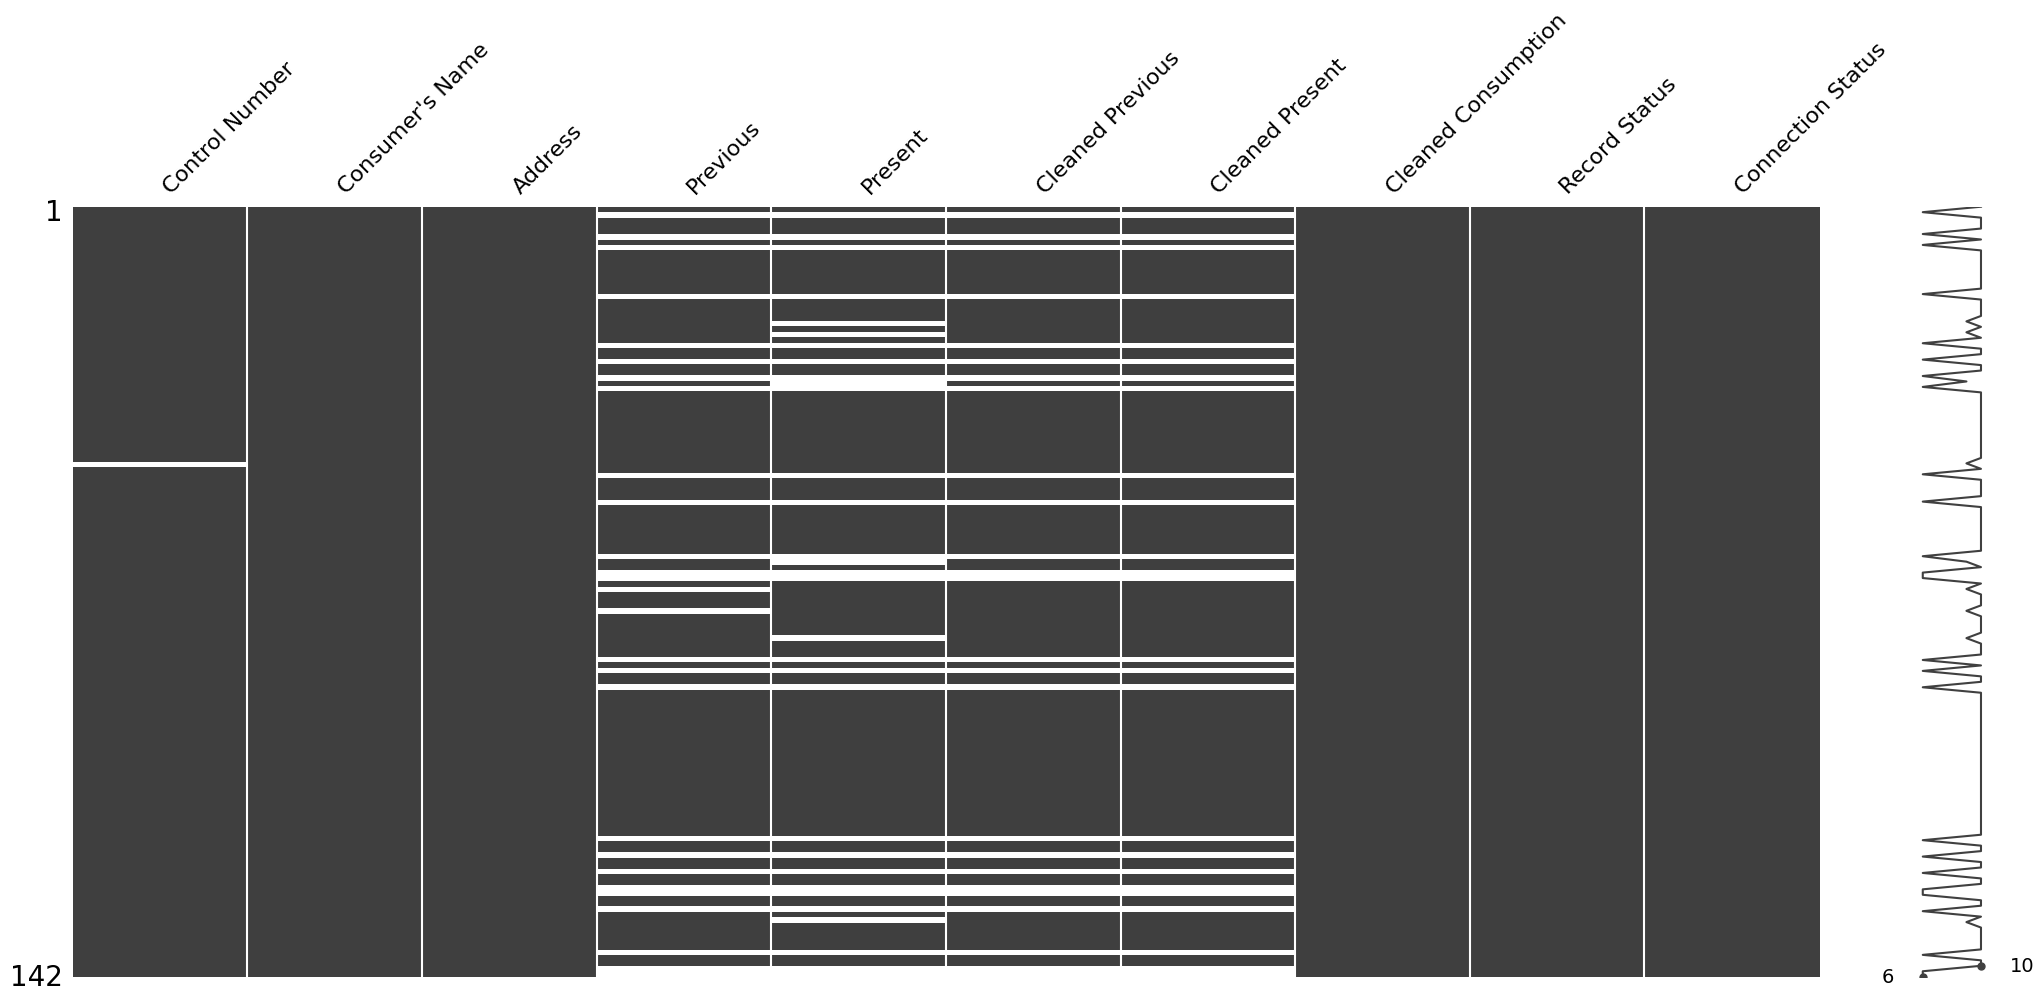

In [2]:
import pandas as pd
import missingno as msno
df = pd.read_csv("../../dataset/preprocessed/2020/JAN2020_preprocessed.csv")
df.info()
display(df['Record Status'].value_counts())

sample_df = df.drop("Water Meter Serial #", axis=1).sample(frac=0.1)
sample_df = sample_df[~sample_df['Record Status'].isin(['Invalid', 'Empty'])]
msno.matrix(sample_df)